<a href="https://colab.research.google.com/github/Tonytroller/TPs-ML/blob/main/TP3%20ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import matplotlib
import numpy as np
import tensorflow 
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.layers import Dropout
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [22]:
from google.colab import drive
import os

# Monter Google Drive dans Colab
drive.mount('/content/gdrive')

# Spécifier le chemin d'accès au dossier sur Google Drive
trainData = "/content/gdrive/MyDrive/Colab Notebooks/cats_and_dogs/train"
testData = "/content/gdrive/MyDrive/Colab Notebooks/cats_and_dogs/test"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [87]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    #rotation_range=20,  # rotation de l'image de 20 degrés
    width_shift_range=0.1,  # translation horizontale de 20% de la largeur de l'image
    height_shift_range=0.1,  # translation verticale de 20% de la hauteur de l'image
    #brightness_range=(3,5),  # changement de luminosité
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,  # retournement horizontal de l'image
    vertical_flip=True,   # retournement vertical de l'image
    #fill_mode='nearest'  # mode de remplissage pour les pixels nouvellement créés
)

train_generator = train_datagen.flow_from_directory(
    trainData,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
)

Found 557 images belonging to 2 classes.


In [88]:
test_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

test_generator = test_datagen.flow_from_directory(
    testData,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
)

Found 140 images belonging to 2 classes.


In [89]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

#model.add(Conv2D(128, (3, 3), activation='relu'))
#model.add(MaxPooling2D((2, 2)))

#model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [92]:
TrainModel=model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=20
)

Epoch 1/20
18/18 [==============================] - 20s 1s/step - loss: 0.5999 - accuracy: 0.6679
Epoch 2/20
18/18 [==============================] - 19s 1s/step - loss: 0.5988 - accuracy: 0.6894
Epoch 3/20
18/18 [==============================] - 20s 1s/step - loss: 0.6211 - accuracy: 0.6768
Epoch 4/20
18/18 [==============================] - 19s 1s/step - loss: 0.5878 - accuracy: 0.6768
Epoch 5/20
18/18 [==============================] - 20s 1s/step - loss: 0.5945 - accuracy: 0.6804
Epoch 6/20
18/18 [==============================] - 19s 1s/step - loss: 0.5985 - accuracy: 0.6661
Epoch 7/20
18/18 [==============================] - 20s 1s/step - loss: 0.5787 - accuracy: 0.6876
Epoch 8/20
18/18 [==============================] - 19s 1s/step - loss: 0.5641 - accuracy: 0.7199
Epoch 9/20
18/18 [==============================] - 19s 1s/step - loss: 0.6014 - accuracy: 0.6894
Epoch 10/20
18/18 [==============================] - 19s 1s/step - loss: 0.5645 - accuracy: 0.7092
Epoch 11/20
18/18 [

In [84]:
#preds = model.predict(test_generator)
loss, accuracy = model.evaluate(test_generator)

print('Loss on test set:', loss)
print('Accuracy on test set:', accuracy)

5/5 [==============================] - 2s 375ms/step - loss: 0.6743 - accuracy: 0.6214
Loss on test set: 0.6743487119674683
Accuracy on test set: 0.6214285492897034


5/5 [==============================] - 3s 482ms/step


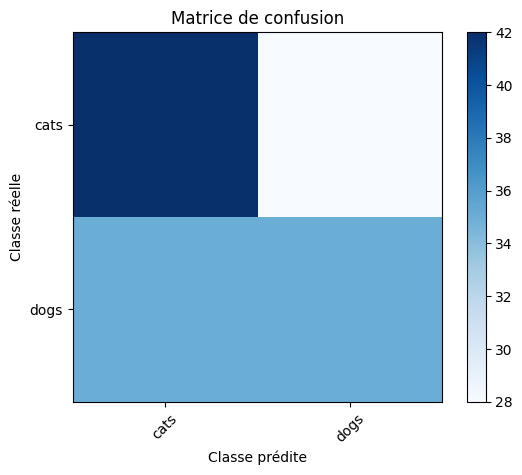

5/5 - 3s - loss: 0.6743 - accuracy: 0.6214 - 3s/epoch - 574ms/step
Accuracy sur les données de test : 0.6214285492897034


In [86]:
# Prédiction sur les données de test
y_pred = model.predict(test_generator)
y_pred = np.round(y_pred)

# Affichage de la matrice de confusion
cm = confusion_matrix(test_generator.classes, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Matrice de confusion')
plt.colorbar()
tick_marks = np.arange(len(test_generator.class_indices))
plt.xticks(tick_marks, test_generator.class_indices.keys(), rotation=45)
plt.yticks(tick_marks, test_generator.class_indices.keys())
plt.xlabel('Classe prédite')
plt.ylabel('Classe réelle')
plt.show()

# Affichage de l'accuracy sur les données de test
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print('Accuracy sur les données de test :', test_acc)

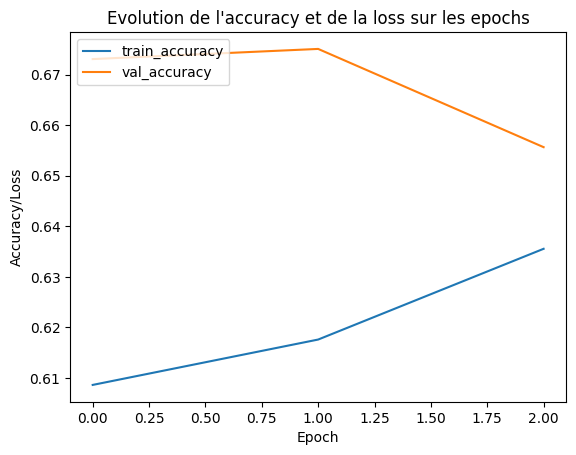

In [40]:
# Affichage de la courbe d'évolution de l'accuracy et de la loss sur les epochs
plt.plot(TrainModel.history['accuracy'])
plt.plot(TrainModel.history['loss'])
plt.title('Evolution de l\'accuracy et de la loss sur les epochs')
plt.ylabel('Accuracy/Loss')
plt.xlabel('Epoch')
plt.legend(['train_accuracy', 'val_accuracy', 'train_loss', 'val_loss'], loc='upper left')
plt.show()